In [ ]:
!pip install scikit-learn==1.5.2

In [30]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

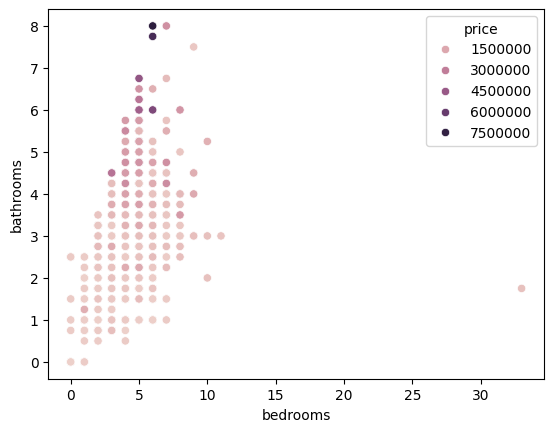

In [31]:
import seaborn as sns
sns.scatterplot(data=housing, x='bedrooms', y='bathrooms', hue='price')

In [32]:
date_year = pd.to_datetime(housing['date']).dt.year
date_year


,date
0,2014
1,2015
2,2014
3,2014
4,2014
...,...
19995,2014
19996,2014
19997,2014
19998,2014


In [33]:
housing['date'] = date_year
housing

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,2014,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,2015,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,2014,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,2014,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,2014,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5272200045,2014,3,1.50,1000,6914,1.0,0,0,3,...,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,378000.0
19996,9578500790,2014,3,2.50,3087,5002,2.0,0,0,3,...,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,399950.0
19997,7202350480,2014,3,2.50,2120,4780,2.0,0,0,3,...,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,575000.0
19998,1723049033,2014,1,0.75,380,15000,1.0,0,0,3,...,380,0,1963,0,98168,47.4810,-122.323,1170,15000,245000.0


In [34]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [35]:
# Get our target variable and features and split them into test and train datasets
X = housing.drop('price', axis=1)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([713046.1 , 522336.1 , 544968.3 , ..., 325866.9 , 613228.94,
       391778.44], dtype=float32)

In [38]:
# Just a quick comparison with y_test to see if they match up
predictions == y_test

,price
10650,False
2041,False
8668,False
1114,False
13902,False
...,...
4073,False
7442,False
9999,False
1870,False


<Axes: xlabel='bedrooms', ylabel='bathrooms'>

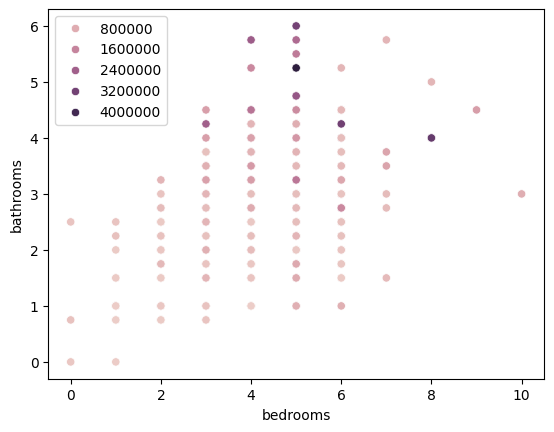

In [39]:
import seaborn as sns
sns.scatterplot(data=X_test, x='bedrooms', y='bathrooms', hue=predictions)

In [40]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import root_mean_squared_error

result = root_mean_squared_error(y_test, predictions)
result

134303.46142314246

In [43]:
# Put in a cvs file the predictions
predictions_Tocvs = pd.DataFrame(predictions)
predictions = {'price': predictions_Tocvs}
predictions_Tocvs.shape
predictions_Tocvs.to_csv('price.csv', index=False)



In [24]:
# Looks like we're off by just 4.5 mpg on average
# Not bad for a quick run with no real preprocessing
result / housing['price'].mean()

0.2554091675864685